FUNDAMENTALS OF MACHINE LEARNING FINAL PROJECT

YESWANTH SIRIPURAPU(811298603)

In [5]:
import pandas as pd
file_path = "fuel_receipts_costs_eia923.csv"
#reading the csv file
df = pd.read_csv(file_path)

In [6]:
df.head()

,rowid,plant_id_eia,plant_id_eia_label,report_date,contract_type_code,contract_type_code_label,contract_expiration_date,energy_source_code,energy_source_code_label,fuel_type_code_pudl,...,primary_transportation_mode_code,primary_transportation_mode_code_label,secondary_transportation_mode_code,secondary_transportation_mode_code_label,natural_gas_transport_code,natural_gas_delivery_contract_type_code,moisture_content_pct,chlorine_content_ppm,data_maturity,data_maturity_label
0,1,3,Barry,2008-01-01,C,C,2008-04-01,BIT,BIT,coal,...,RV,RV,NaN,NaN,firm,NaN,NaN,NaN,final,final
1,2,3,Barry,2008-01-01,C,C,2008-04-01,BIT,BIT,coal,...,RV,RV,NaN,NaN,firm,NaN,NaN,NaN,final,final
2,3,3,Barry,2008-01-01,C,C,NaN,NG,NG,gas,...,PL,PL,NaN,NaN,firm,NaN,NaN,NaN,final,final
3,4,7,Gadsden,2008-01-01,C,C,2015-12-01,BIT,BIT,coal,...,TR,TR,NaN,NaN,firm,NaN,NaN,NaN,final,final
4,5,7,Gadsden,2008-01-01,S,S,2008-11-01,BIT,BIT,coal,...,TR,TR,NaN,NaN,firm,NaN,NaN,NaN,final,final


In [10]:
df2 = df
#we need to get the copy of the data.


TASK


In [9]:
#getting important library
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
print(df.dtypes)
#seeing the datatype of the data

rowid                                         int64
plant_id_eia                                  int64
plant_id_eia_label                           object
report_date                                  object
contract_type_code                           object
contract_type_code_label                     object
contract_expiration_date                     object
energy_source_code                           object
energy_source_code_label                     object
fuel_type_code_pudl                          object
fuel_group_code                              object
mine_id_pudl                                float64
mine_id_pudl_label                          float64
supplier_name                                object
fuel_received_units                         float64
fuel_mmbtu_per_unit                         float64
sulfur_content_pct                          float64
ash_content_pct                             float64
mercury_content_ppm                         float64
fuel_cost_pe

In [12]:
df.info()
#getting the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   rowid                                     1000 non-null   int64  
 1   plant_id_eia                              1000 non-null   int64  
 2   plant_id_eia_label                        1000 non-null   object 
 3   report_date                               1000 non-null   object 
 4   contract_type_code                        1000 non-null   object 
 5   contract_type_code_label                  1000 non-null   object 
 6   contract_expiration_date                  554 non-null    object 
 7   energy_source_code                        1000 non-null   object 
 8   energy_source_code_label                  1000 non-null   object 
 9   fuel_type_code_pudl                       1000 non-null   object 
 10  fuel_group_code                      

In [13]:
print(df.dtypes)
#getting the infor about the data

rowid                                         int64
plant_id_eia                                  int64
plant_id_eia_label                           object
report_date                                  object
contract_type_code                           object
contract_type_code_label                     object
contract_expiration_date                     object
energy_source_code                           object
energy_source_code_label                     object
fuel_type_code_pudl                          object
fuel_group_code                              object
mine_id_pudl                                float64
mine_id_pudl_label                          float64
supplier_name                                object
fuel_received_units                         float64
fuel_mmbtu_per_unit                         float64
sulfur_content_pct                          float64
ash_content_pct                             float64
mercury_content_ppm                         float64
fuel_cost_pe

In [14]:
df.describe()
#descripiton of the data.

,rowid,plant_id_eia,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,natural_gas_delivery_contract_type_code,moisture_content_pct,chlorine_content_ppm
count,1000.000000,1000.000000,533.000000,533.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,0.0,756.000000,0.0,0.0,0.0
mean,500.500000,867.647000,110.797373,110.797373,1.030101e+05,13.420019,0.685710,4.915780,NaN,5.785993,NaN,NaN,NaN
std,288.819436,494.824251,83.889631,83.889631,4.396658e+05,10.266133,0.973392,5.063778,NaN,5.332886,NaN,NaN,NaN
min,1.000000,3.000000,0.000000,0.000000,1.000000e+00,0.857000,0.000000,0.000000,NaN,0.343000,NaN,NaN,NaN
25%,250.750000,535.000000,32.000000,32.000000,1.431000e+03,1.030000,0.000000,0.000000,NaN,1.947250,NaN,NaN,NaN
50%,500.500000,886.000000,97.000000,97.000000,1.311650e+04,17.160000,0.300000,4.700000,NaN,3.082000,NaN,NaN,NaN
75%,750.250000,1355.000000,185.000000,185.000000,4.381150e+04,23.814000,0.900000,9.400000,NaN,8.400000,NaN,NaN,NaN
max,1000.000000,1710.000000,263.000000,263.000000,6.067067e+06,29.400000,6.610000,20.900000,NaN,29.514000,NaN,NaN,NaN


DATA CLEANING


In [15]:
df.isnull().sum()
#seeing the null value.

rowid                                          0
plant_id_eia                                   0
plant_id_eia_label                             0
report_date                                    0
contract_type_code                             0
contract_type_code_label                       0
contract_expiration_date                     446
energy_source_code                             0
energy_source_code_label                       0
fuel_type_code_pudl                            0
fuel_group_code                                0
mine_id_pudl                                 467
mine_id_pudl_label                           467
supplier_name                                  0
fuel_received_units                            0
fuel_mmbtu_per_unit                            0
sulfur_content_pct                             0
ash_content_pct                                0
mercury_content_ppm                         1000
fuel_cost_per_mmbtu                          244
primary_transportati

In [16]:
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage
#seeing the null value using the percentage

rowid                                         0.0
plant_id_eia                                  0.0
plant_id_eia_label                            0.0
report_date                                   0.0
contract_type_code                            0.0
contract_type_code_label                      0.0
contract_expiration_date                     44.6
energy_source_code                            0.0
energy_source_code_label                      0.0
fuel_type_code_pudl                           0.0
fuel_group_code                               0.0
mine_id_pudl                                 46.7
mine_id_pudl_label                           46.7
supplier_name                                 0.0
fuel_received_units                           0.0
fuel_mmbtu_per_unit                           0.0
sulfur_content_pct                            0.0
ash_content_pct                               0.0
mercury_content_ppm                         100.0
fuel_cost_per_mmbtu                          24.4


In [17]:
columns_to_drop = null_percentage[null_percentage > 35].index

#droping the null value column having the null percentage more than 35 percentage.
df = df.drop(columns=columns_to_drop)
df.isnull().sum()

rowid                                       0
plant_id_eia                                0
plant_id_eia_label                          0
report_date                                 0
contract_type_code                          0
contract_type_code_label                    0
energy_source_code                          0
energy_source_code_label                    0
fuel_type_code_pudl                         0
fuel_group_code                             0
supplier_name                               0
fuel_received_units                         0
fuel_mmbtu_per_unit                         0
sulfur_content_pct                          0
ash_content_pct                             0
fuel_cost_per_mmbtu                       244
primary_transportation_mode_code          257
primary_transportation_mode_code_label    257
data_maturity                               0
data_maturity_label                         0
dtype: int64

In [18]:
import numpy as np
# Filling of the null value
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Filling of null value categorical
categorical_columns = df.select_dtypes(include=[np.object]).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

<ipython-input-18-063e6773f86e>:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_columns = df.select_dtypes(include=[np.object]).columns


In [19]:
df.isnull().sum()
#checking the data is null or not.

rowid                                     0
plant_id_eia                              0
plant_id_eia_label                        0
report_date                               0
contract_type_code                        0
contract_type_code_label                  0
energy_source_code                        0
energy_source_code_label                  0
fuel_type_code_pudl                       0
fuel_group_code                           0
supplier_name                             0
fuel_received_units                       0
fuel_mmbtu_per_unit                       0
sulfur_content_pct                        0
ash_content_pct                           0
fuel_cost_per_mmbtu                       0
primary_transportation_mode_code          0
primary_transportation_mode_code_label    0
data_maturity                             0
data_maturity_label                       0
dtype: int64

In [20]:
df.head()

,rowid,plant_id_eia,plant_id_eia_label,report_date,contract_type_code,contract_type_code_label,energy_source_code,energy_source_code_label,fuel_type_code_pudl,fuel_group_code,supplier_name,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,fuel_cost_per_mmbtu,primary_transportation_mode_code,primary_transportation_mode_code_label,data_maturity,data_maturity_label
0,1,3,Barry,2008-01-01,C,C,BIT,BIT,coal,coal,interocean coal,259412.0,23.100,0.49,5.4,2.135,RV,RV,final,final
1,2,3,Barry,2008-01-01,C,C,BIT,BIT,coal,coal,interocean coal,52241.0,22.800,0.48,5.7,2.115,RV,RV,final,final
2,3,3,Barry,2008-01-01,C,C,NG,NG,gas,natural_gas,bay gas pipeline,2783619.0,1.039,0.00,0.0,8.631,PL,PL,final,final
3,4,7,Gadsden,2008-01-01,C,C,BIT,BIT,coal,coal,alabama coal,25397.0,24.610,1.69,14.7,2.776,TR,TR,final,final
4,5,7,Gadsden,2008-01-01,S,S,BIT,BIT,coal,coal,d & e mining,764.0,24.446,0.84,15.5,3.381,TR,TR,final,final


plotting some graphics from the data.

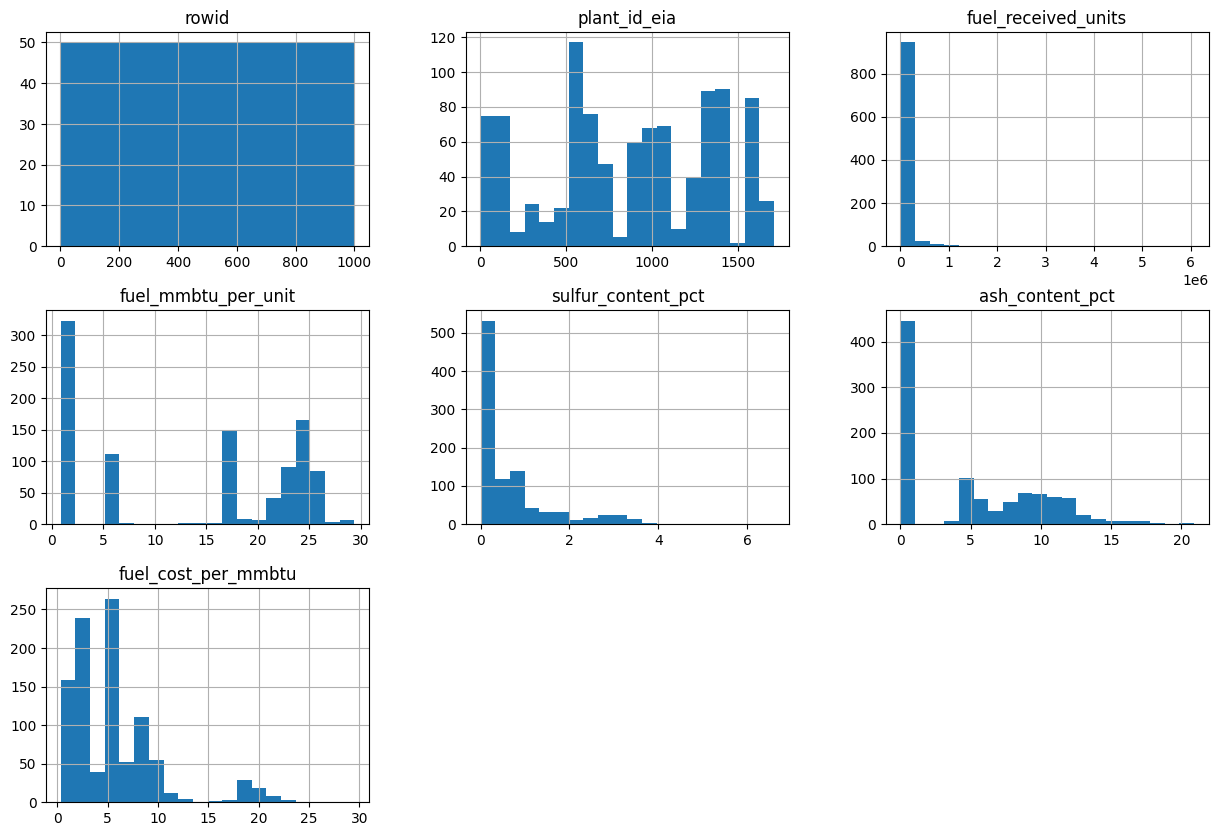

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
#seeing the distribution of all the numeric data.
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.show()

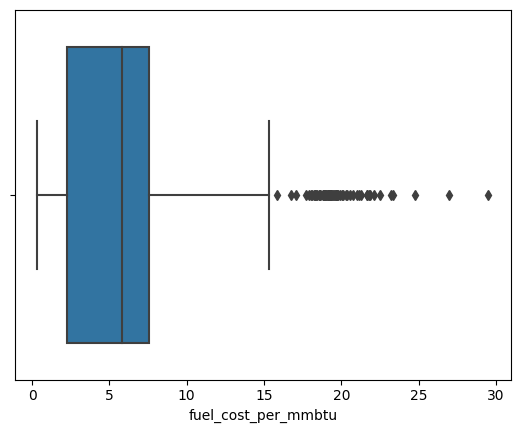

In [22]:
sns.boxplot(x='fuel_cost_per_mmbtu', data=df)
plt.show()
#seeing the distribution of the costper per mmbtu

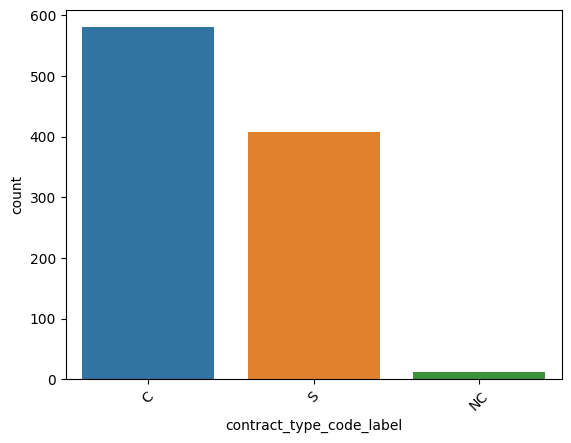

In [23]:
sns.countplot(x='contract_type_code_label', data=df)
plt.xticks(rotation=45)
plt.show()
#seeing the contract type code label.

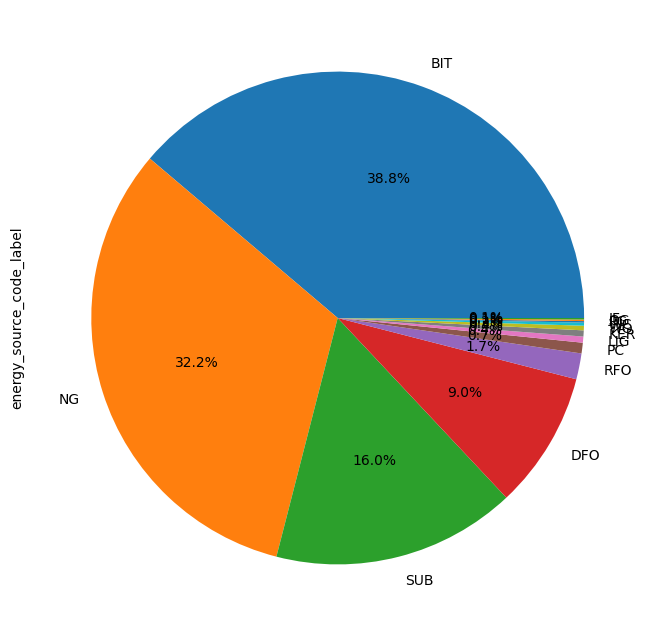

BIT    388
NG     322
SUB    160
DFO     90
RFO     17
PC       7
LIG      4
KER      4
WO       3
WC       2
PG       1
OG       1
JF       1
Name: energy_source_code_label, dtype: int64

In [24]:
df['energy_source_code_label'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.show()
df['energy_source_code_label'].value_counts()

#seeing the energy_source_doce label.

In [25]:
print(df.describe())
#seeing the description fo the clean data.

             rowid  plant_id_eia  fuel_received_units  fuel_mmbtu_per_unit  \
count  1000.000000   1000.000000         1.000000e+03          1000.000000   
mean    500.500000    867.647000         1.030101e+05            13.420019   
std     288.819436    494.824251         4.396658e+05            10.266133   
min       1.000000      3.000000         1.000000e+00             0.857000   
25%     250.750000    535.000000         1.431000e+03             1.030000   
50%     500.500000    886.000000         1.311650e+04            17.160000   
75%     750.250000   1355.000000         4.381150e+04            23.814000   
max    1000.000000   1710.000000         6.067067e+06            29.400000   

       sulfur_content_pct  ash_content_pct  fuel_cost_per_mmbtu  
count         1000.000000      1000.000000          1000.000000  
mean             0.685710         4.915780             5.785993  
std              0.973392         5.063778             4.636103  
min              0.000000        

<ipython-input-26-88b35f80d076>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


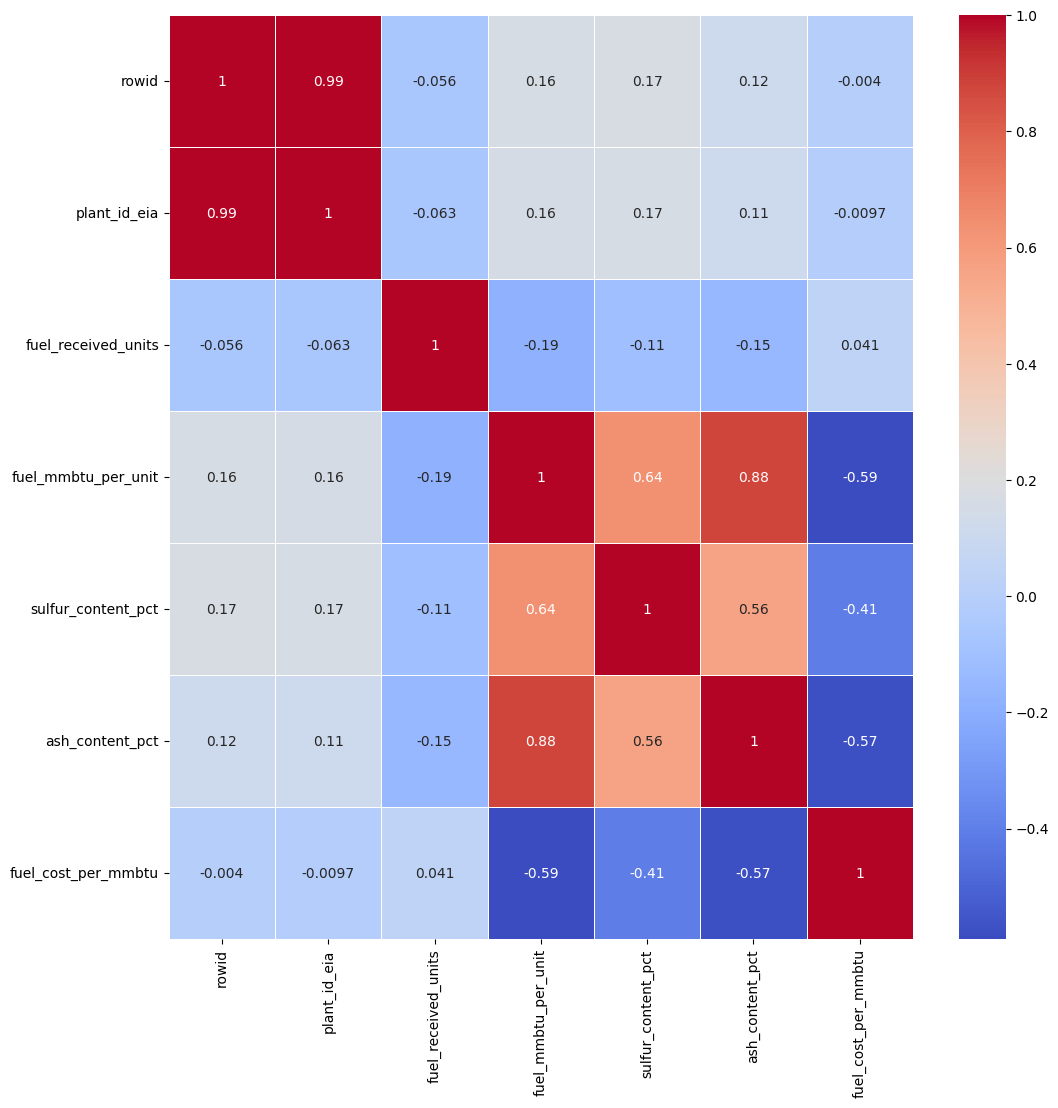

<ipython-input-26-88b35f80d076>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,rowid,plant_id_eia,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,fuel_cost_per_mmbtu
rowid,1.000000,0.993835,-0.056134,0.163386,0.173547,0.116184,-0.004044
plant_id_eia,0.993835,1.000000,-0.063403,0.157575,0.167000,0.113713,-0.009697
fuel_received_units,-0.056134,-0.063403,1.000000,-0.185860,-0.110104,-0.147567,0.040935
fuel_mmbtu_per_unit,0.163386,0.157575,-0.185860,1.000000,0.636903,0.880177,-0.590312
sulfur_content_pct,0.173547,0.167000,-0.110104,0.636903,1.000000,0.560380,-0.407959
ash_content_pct,0.116184,0.113713,-0.147567,0.880177,0.560380,1.000000,-0.572700
fuel_cost_per_mmbtu,-0.004044,-0.009697,0.040935,-0.590312,-0.407959,-0.572700,1.000000


In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()
df.corr()
#seeing the heatmap for the relation.

PERFORMING MORE ANALYSIS

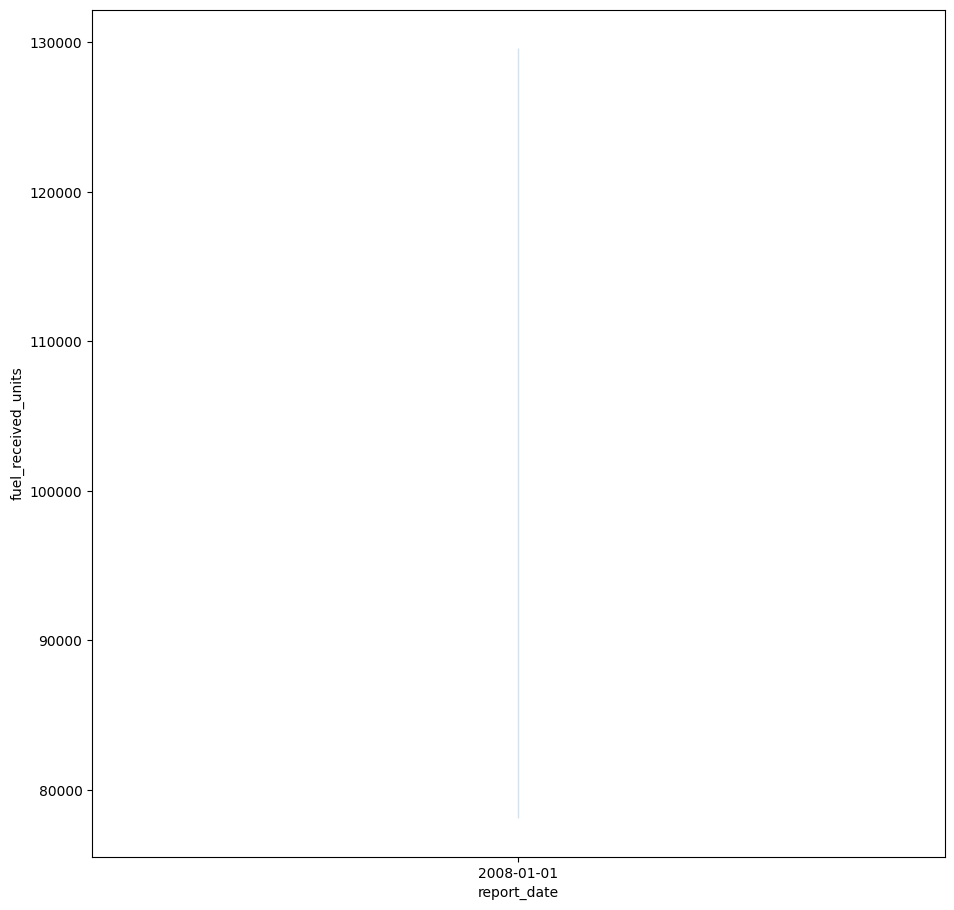

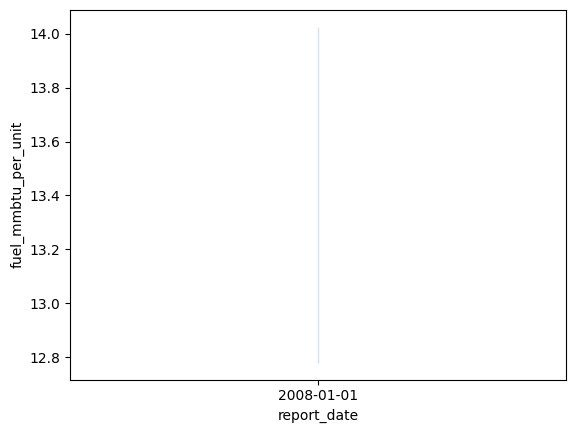

In [28]:
plt.figure(figsize=(11,11))
# Distribution of the fuel received over units over time
sns.lineplot(x='report_date', y='fuel_received_units', data=df)
plt.show()

# Trends in the fuel MMBTU over unit over the years
sns.lineplot(x='report_date', y='fuel_mmbtu_per_unit', data=df)
plt.show()

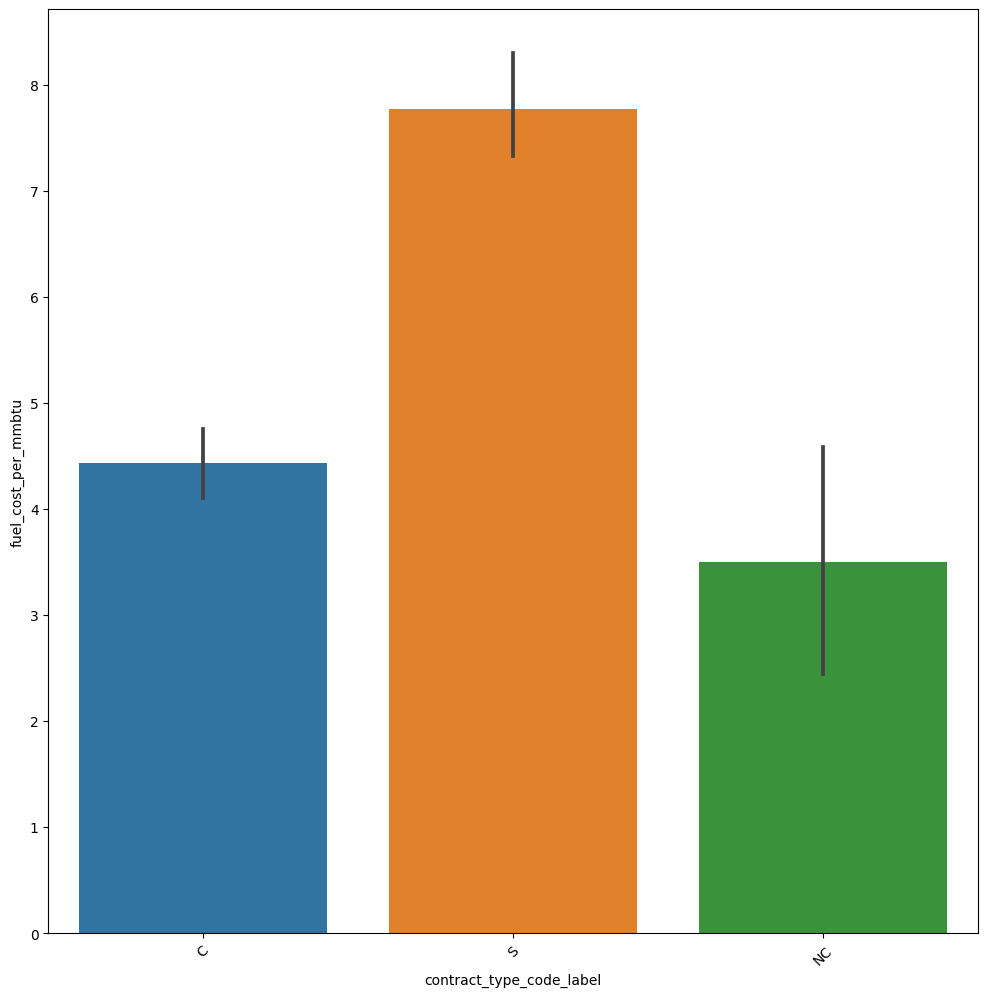

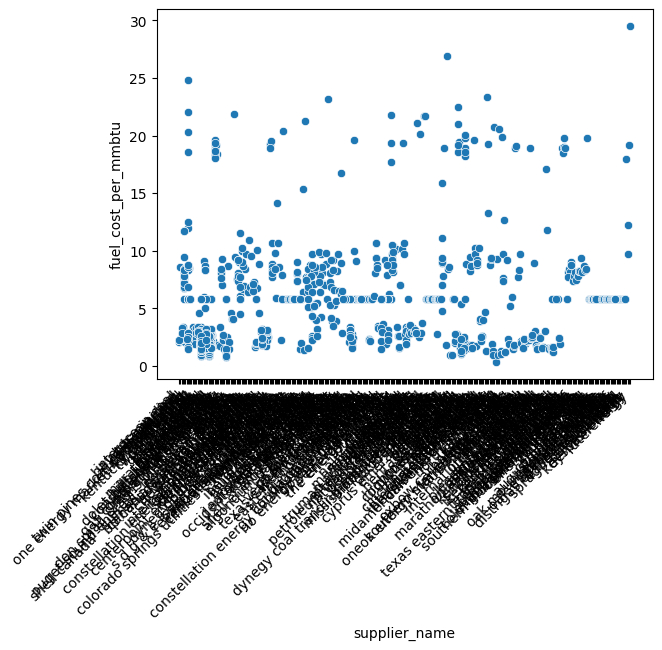

In [29]:
plt.figure(figsize=(12,12))
# Aveg fuel cost per MMBTU for different of contract types

sns.barplot(x='contract_type_code_label', y='fuel_cost_per_mmbtu', data=df)
plt.xticks(rotation=45)
plt.show()

# Correlation between fuel cost over MMBTU and supplier names
sns.scatterplot(x='supplier_name', y='fuel_cost_per_mmbtu', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

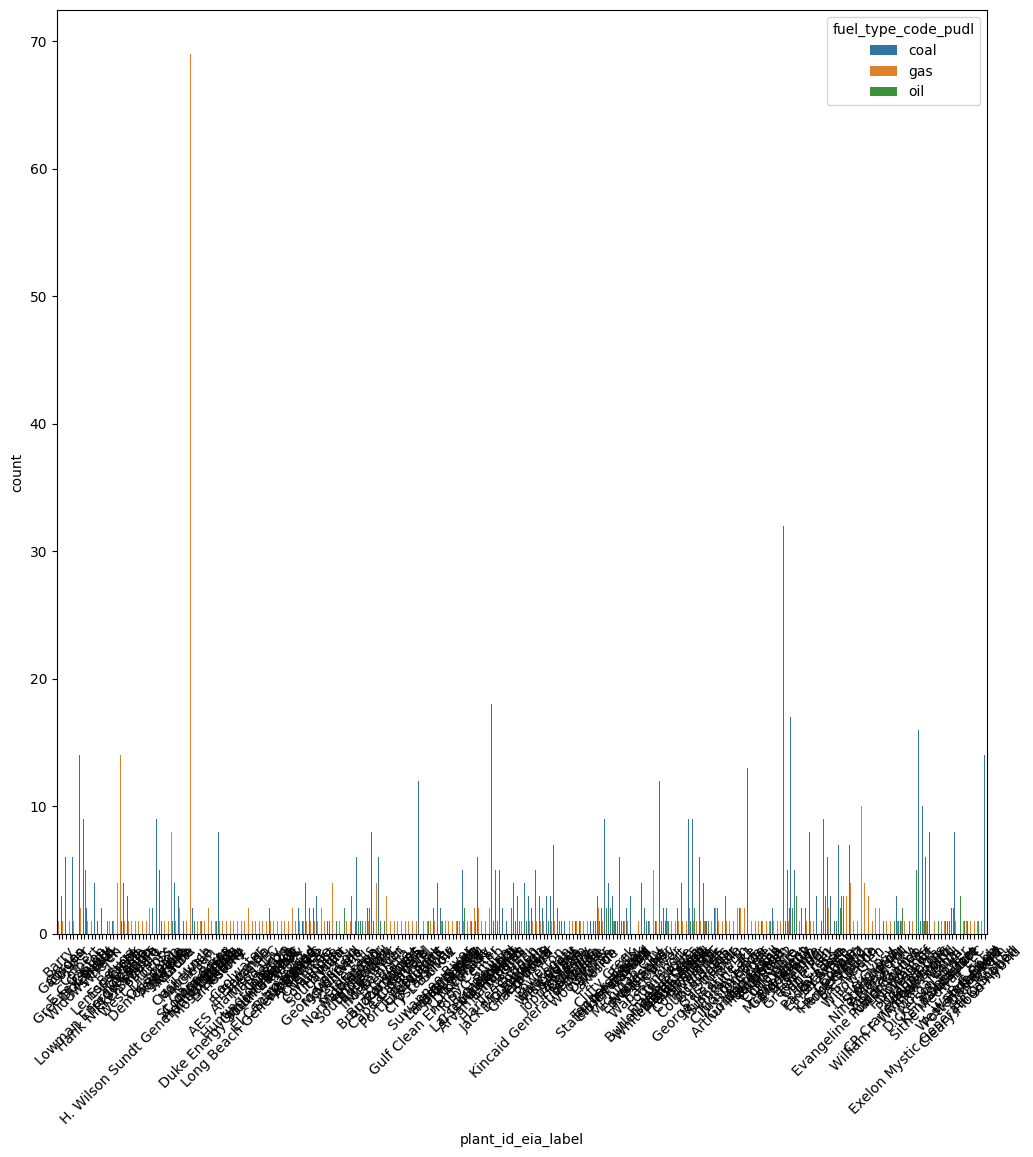

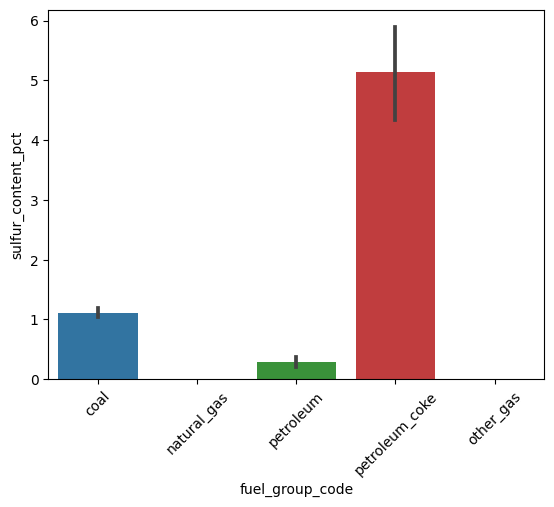

In [30]:
plt.figure(figsize=(12,12))
# Distribution of the fuel over diferent plant_id_eia label.
sns.countplot(x='plant_id_eia_label', hue='fuel_type_code_pudl', data=df)
plt.xticks(rotation=45)
plt.show()

# fuel group code over sulfur content pct.
sns.barplot(x='fuel_group_code', y='sulfur_content_pct', data=df)
plt.xticks(rotation=45)
plt.show()

Train test split of the data

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Seting a random seed for reproducibility
random_seed = 1234  # Useing of the 4-digit number as the seed
# Randomly sampleing of the about 2% of the data
sampled_data = df.sample(frac=0.02, random_state=random_seed)
# Split the data into the training set of (75%) and a test set of (25%)
train_data, test_data = train_test_split(sampled_data, test_size=0.25, random_state=random_seed)
test_data.head()
#test data.

,rowid,plant_id_eia,plant_id_eia_label,report_date,contract_type_code,contract_type_code_label,energy_source_code,energy_source_code_label,fuel_type_code_pudl,fuel_group_code,supplier_name,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,fuel_cost_per_mmbtu,primary_transportation_mode_code,primary_transportation_mode_code_label,data_maturity,data_maturity_label
768,769,1356,Ghent,2008-01-01,S,S,BIT,BIT,coal,coal,pleasant view mining,4392.0,23.568,3.26,10.8,1.544,RV,RV,final,final
89,90,99,Frederickson,2008-01-01,S,S,NG,NG,gas,natural_gas,avista,680.0,1.030,0.00,0.0,9.760,RR,RR,final,final
155,156,246,Humboldt Bay,2008-01-01,S,S,NG,NG,gas,natural_gas,pg&e,641364.0,1.021,0.00,0.0,7.857,RR,RR,final,final
29,30,26,E C Gaston,2008-01-01,C,C,BIT,BIT,coal,coal,perry county,20358.0,25.723,0.92,7.7,3.057,RR,RR,final,final
982,983,1695,B C Cobb,2008-01-01,S,S,NG,NG,gas,natural_gas,b p canada,26465.0,1.015,0.00,0.0,8.936,RR,RR,final,final


In [32]:
train_data.head()
#training data.

,rowid,plant_id_eia,plant_id_eia_label,report_date,contract_type_code,contract_type_code_label,energy_source_code,energy_source_code_label,fuel_type_code_pudl,fuel_group_code,supplier_name,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,fuel_cost_per_mmbtu,primary_transportation_mode_code,primary_transportation_mode_code_label,data_maturity,data_maturity_label
363,364,628,Crystal River,2008-01-01,C,C,BIT,BIT,coal,coal,"icg, llc",34648.0,24.260,1.16,11.7,3.192000,RR,RR,final,final
438,439,708,Hammond,2008-01-01,C,C,BIT,BIT,coal,coal,delta coals,37157.0,25.201,1.49,11.3,2.826000,RR,RR,final,final
681,682,1239,Riverton,2008-01-01,C,C,SUB,SUB,coal,coal,arch,30643.0,17.656,0.30,5.2,1.691000,RR,RR,final,final
620,621,1077,Sutherland,2008-01-01,C,C,SUB,SUB,coal,coal,rio tinto,14510.0,17.530,0.46,4.9,1.373000,RR,RR,final,final
466,467,861,Coffeen,2008-01-01,C,C,SUB,SUB,coal,coal,peabody coal,206612.0,17.520,0.20,4.6,5.785993,RR,RR,final,final


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

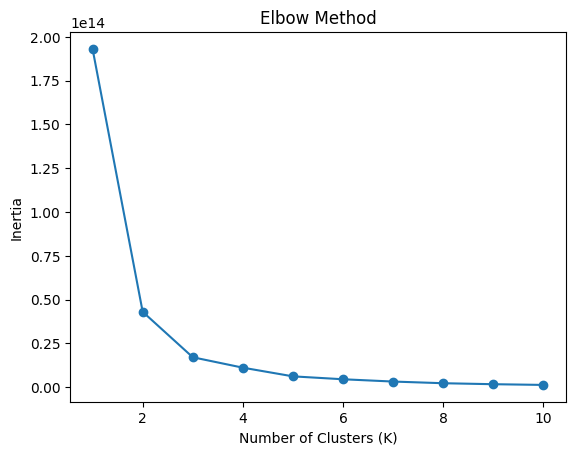

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#feature matrix.
X = df[['fuel_received_units', 'fuel_mmbtu_per_unit', 'sulfur_content_pct', 'ash_content_pct']]

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# seeing of the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [34]:
from sklearn.cluster import KMeans

k = 3 #k value
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)
cluster_data = pd.concat([df, pd.Series(clusters, name='cluster')], axis=1)
cluster_analysis = cluster_data.groupby('cluster').mean()
print(cluster_analysis)
#cluster of the data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


              rowid  plant_id_eia  fuel_received_units  fuel_mmbtu_per_unit  \
cluster                                                                       
0        502.298958    872.069792         3.700990e+04            13.906707   
1        321.777778    563.888889         4.167994e+06             1.029000   
2        496.677419    818.870968         9.667301e+05             1.945774   

         sulfur_content_pct  ash_content_pct  fuel_cost_per_mmbtu  
cluster                                                            
0                  0.713240         5.097583             5.716472  
1                  0.000000         0.000000             7.883331  
2                  0.032258         0.712903             7.329997  


<ipython-input-34-f45f319067e3>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = cluster_data.groupby('cluster').mean()


EXTRA CREDIT QUESTION

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# target variable and dependent variable.
features = ['fuel_received_units', 'fuel_mmbtu_per_unit', 'sulfur_content_pct', 'ash_content_pct']
target = 'fuel_cost_per_mmbtu'
# doing train test split.
X_train, X_test, y_train, y_test = train_test_split(train_data[features], train_data[target], test_size=0.2, random_state=42)
# implemtning linear regression.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
# predicting the model.
y_pred = model.predict(X_test)

# evaluating the mode.
mse_without_cluster = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error without Cluster Information: {mse_without_cluster}')

Mean Squared Error without Cluster Information: 4.5090686910783475
